In [1]:
#This is the main preprocessing file

import  cv2
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
import scipy.io as scio
import os
import numpy as np
import matplotlib.pyplot as plt
#for dlib to use GPU and maybe get a better speed
import dlib.cuda as cuda;
import dlib
print(cuda.get_num_devices())
dlib.DLIB_USE_CUDA = True
print(dlib.DLIB_USE_CUDA)

Using TensorFlow backend.


1
True


In [2]:
# this function read a video file from a subject and then splits it into various spoken tokens based on the timing info 
# stored in subj_part_times.mat file. It also segments the face from the video and stores only the face. Lastly, the audio 
# is removed from the video and is stored in a separate file

import cv2
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
import scipy.io as scio
import os
import numpy as np

filelist=np.load('filelist_1100.mat.npy')
newlabels=np.load('labels_1100.mat.npy')

for i in range(np.shape(filelist)[0]):
    vfile=filelist[i]+'_both.wmv'
    print(vfile)
    vid = cv2.VideoCapture(vfile)
    detector = MTCNN()
    while(vid.isOpened()):
        retval, image = vid.read()
        frame_num=vid.get(cv2.CAP_PROP_POS_FRAMES)
        if(frame_num==1):
            faces = detector.detect_faces(image)
            if(len(faces)>0):
                x,y,width,height =faces[0]['box']
                
                nx,ny=faces[0]['keypoints']['nose']
                lmx,lmy=faces[0]['keypoints']['mouth_left']
                rmx,rmy=faces[0]['keypoints']['mouth_right']
                lex,ley=faces[0]['keypoints']['left_eye']
                rex,rey=faces[0]['keypoints']['right_eye']
                # in case of negative values when full face in not in the image
                x=max(0,x)
                y=max(0,y)
            else:
                print("================================ ")
                print("Error: Face not detected !!!!!!! ")
                print("================================ ")
        else:
            vid.release()
            face_file=filelist[i]+'_face_coord'                       
            np.save(face_file,[y,min(y+height+100,np.shape(image)[0]-1),x-100,min(x+width+100,np.shape(image)[1]-1),  nx,ny,lmx,lmy,rmx,rmy,lex,ley,rex,rey])
            imfile=filelist[i]+'_face.jpg'                       
            cv2.imwrite(imfile, image[y:min(y+height+100,np.shape(image)[0]-1),x:min(x+width,np.shape(image)[1]-1),:])
            
            #plt.imshow(image[y:y+height+100,x:x+width,:])
            #plt.show()


scratch/avc/lisa_data_opt/1101/1101_part1_cod_1396.0_1437.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_cod_1663.0_1709.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_kid_3023.0_3064.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_kid_3227.0_3268.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_cooed_3475.0_3514.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_cooed_3697.0_3742.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_keyed_3937.0_3973.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_keyed_4169.0_4213.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_could_4891.0_4925.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_cud_6520.0_6556.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_could_7139.0_7174.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_could_7381.0_7419.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part1_kid_8099.0_8135.0_mouth_both.wmv
scratch/avc

scratch/avc/lisa_data_opt/1101/1101_part2_cooed_27848.0_27886.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part2_cooed_28088.0_28125.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_kid_3566.0_3604.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_kid_3767.0_3813.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_cooed_3992.0_4033.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_cod_5126.0_5167.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_cod_5318.0_5368.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_keyed_5530.0_5572.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_keyed_5764.0_5811.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_cud_7826.0_7859.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_cud_8038.0_8073.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_could_8237.0_8273.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1101/1101_part3_could_8446.0_8483.0_mouth_both.wmv
scratch

scratch/avc/lisa_data_opt/1102/1102_part1_could_35578.0_35621.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part1_cod_35746.0_35794.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part1_cod_35906.0_35955.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part1_cooed_36527.0_36571.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part1_cooed_36704.0_36749.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part1_cud_38623.0_38667.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part2_cod_1922.0_1966.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part2_cod_2093.0_2139.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part2_cooed_2530.0_2573.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part2_cooed_2728.0_2773.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part2_keyed_3386.0_3430.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part2_keyed_3535.0_3581.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part2_cud_4979.0_5023.0_mouth_both.wmv

scratch/avc/lisa_data_opt/1102/1102_part3_cud_25438.0_25483.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part3_could_25708.0_25751.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part3_could_25876.0_25923.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part3_keyed_26158.0_26203.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part3_keyed_26467.0_26518.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part3_kid_28606.0_28648.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1102/1102_part3_kid_28754.0_28798.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part1_cod_2864.0_2902.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part1_cod_3097.0_3135.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part1_kid_4268.0_4305.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part1_kid_4466.0_4503.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part1_cooed_4663.0_4703.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part1_cooed_4859.0_4901.0_mouth_both.wmv

scratch/avc/lisa_data_opt/1103/1103_part3_cooed_19030.0_19073.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part3_cud_19168.0_19207.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part3_cud_19309.0_19347.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part3_could_19480.0_19519.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part3_could_19628.0_19667.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part3_keyed_19774.0_19815.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part3_keyed_19913.0_19954.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part3_kid_21202.0_21238.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1103/1103_part3_kid_21335.0_21375.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part1_cud_467.0_508.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part1_cud_629.0_673.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part1_cooed_3217.0_3267.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part1_cooed_3425.0_3481.0_mouth_both.w

scratch/avc/lisa_data_opt/1104/1104_part3_kid_2183.0_2227.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_cooed_2461.0_2511.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_cod_4303.0_4349.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_cod_4528.0_4573.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_keyed_4748.0_4797.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_keyed_5054.0_5104.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_cud_7592.0_7631.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_cud_8189.0_8230.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_could_8389.0_8429.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_could_8590.0_8631.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_cod_9094.0_9136.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_cod_9230.0_9275.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1104/1104_part3_cooed_9421.0_9467.0_mouth_both.wmv
scratch/avc/l

scratch/avc/lisa_data_opt/1105/1105_part2_cud_21197.0_21235.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part2_cod_21484.0_21526.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part2_cod_21620.0_21652.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part2_cooed_21782.0_21825.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part2_cooed_21922.0_21963.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part3_kid_1526.0_1565.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part3_kid_1645.0_1689.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part3_cooed_1822.0_1867.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part3_cod_2578.0_2619.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part3_cod_2713.0_2764.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part3_keyed_2894.0_2935.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part3_keyed_3068.0_3115.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1105/1105_part3_cud_4531.0_4570.0_mouth_both.wmv
scrat

scratch/avc/lisa_data_opt/1106/1106_part1_cod_24364.0_24406.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part1_cod_24539.0_24585.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part1_cooed_25033.0_25078.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part1_cooed_25225.0_25267.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part1_cud_26714.0_26751.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part2_cod_1217.0_1255.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part2_cod_1381.0_1417.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part2_cooed_1732.0_1771.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part2_cooed_1939.0_1978.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part2_keyed_2585.0_2621.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part2_keyed_2729.0_2767.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part2_cud_4184.0_4222.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part2_cud_4364.0_4402.0_mouth_both.wmv
scr

scratch/avc/lisa_data_opt/1106/1106_part3_cud_18463.0_18502.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part3_cud_18668.0_18706.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part3_could_18851.0_18892.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part3_could_18971.0_19011.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part3_keyed_19112.0_19150.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part3_keyed_19261.0_19299.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part3_kid_20695.0_20731.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1106/1106_part3_kid_20813.0_20851.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part1_cod_1853.0_1895.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part1_cod_2161.0_2209.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part1_kid_3590.0_3631.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part1_kid_3835.0_3886.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part1_cooed_4072.0_4117.0_mouth_both.wmv

scratch/avc/lisa_data_opt/1107/1107_part2_kid_23792.0_23833.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_keyed_24376.0_24421.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_keyed_24496.0_24550.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_could_26794.0_26835.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_could_26998.0_27043.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_cud_27263.0_27303.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_cud_27424.0_27472.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_cod_27874.0_27916.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_cod_28067.0_28114.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_cooed_28292.0_28341.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part2_cooed_28474.0_28531.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part3_kid_1877.0_1917.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1107/1107_part3_kid_2071.0_2117.0_mouth_

scratch/avc/lisa_data_opt/1109/1109_part1_could_18368.0_18407.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_could_18484.0_18526.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_cud_18688.0_18725.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_cud_18845.0_18885.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_keyed_20143.0_20185.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_keyed_20303.0_20347.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_kid_20479.0_20517.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_kid_20617.0_20656.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_could_21112.0_21151.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_cod_21265.0_21309.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_cod_21410.0_21451.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_cooed_21835.0_21877.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part1_cooed_21997.0_22042.0_

scratch/avc/lisa_data_opt/1109/1109_part3_cooed_15443.0_15488.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_keyed_15611.0_15653.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_keyed_15724.0_15769.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_cod_15881.0_15922.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_cod_16087.0_16132.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_cod_18389.0_18431.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_cod_18523.0_18565.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_cooed_18974.0_19012.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_cud_19111.0_19145.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_cud_19234.0_19273.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_could_19379.0_19415.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_could_19513.0_19546.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1109/1109_part3_keyed_19667.0_19709.0_

scratch/avc/lisa_data_opt/1110/1110_part2_cooed_17296.0_17327.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_cooed_17429.0_17476.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_could_18170.0_18203.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_cud_18566.0_18601.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_cod_18686.0_18724.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_cod_18821.0_18868.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_kid_19252.0_19285.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_keyed_19721.0_19757.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_keyed_19820.0_19865.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_could_21464.0_21499.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_could_21587.0_21631.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_cud_21745.0_21779.0_mouth_both.wmv
scratch/avc/lisa_data_opt/1110/1110_part2_cud_21872.0_21915.0_

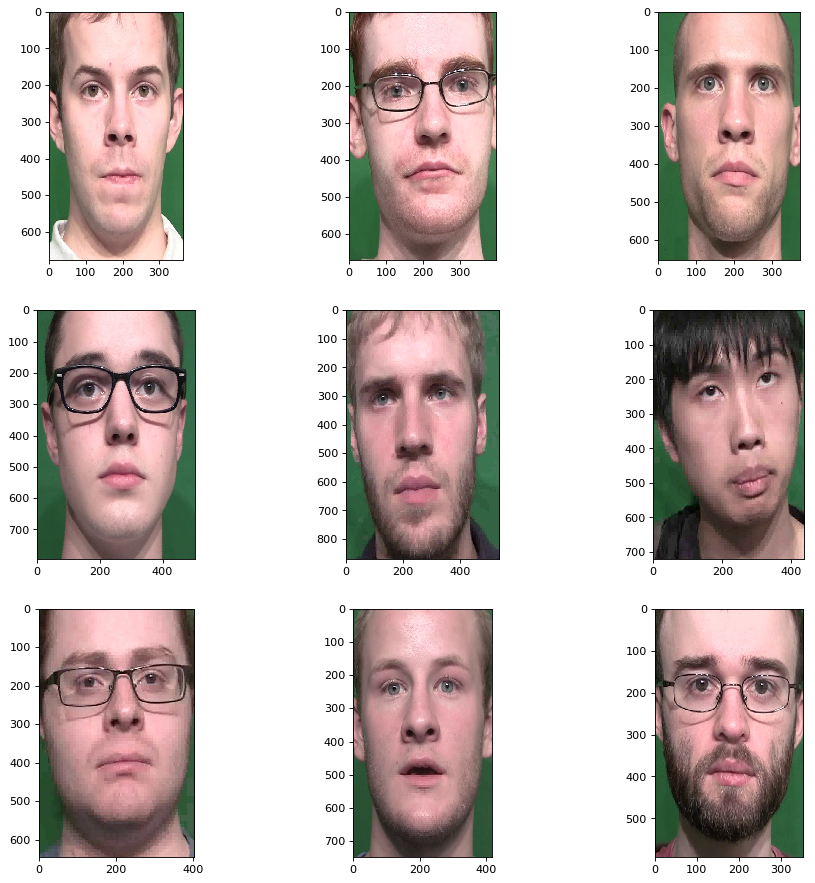

In [3]:
#print(i, imfile, np.shape(image), y,y+height+100,x,x+width)

filelist=np.load('filelist_1100.mat.npy')
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
for s in range(9):
    i=s*160+20
    imfile=filelist[i]+'_face.jpg' 
    image = plt.imread(imfile)
    plt.subplot(3,3,s+1)
    plt.imshow(image)

In [20]:
max(0,y)
#min(x+width,np.shape(image,1))
np.shape(image)[1]

1440